In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load data
data = pd.read_csv('CREMP_SCOR_Summaries_2023_ConditionCounts.csv')

# EDA
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15934 entries, 0 to 15933
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       15934 non-null  int64 
 1   Date       15934 non-null  object
 2   Subregion  15934 non-null  object
 3   Habitat    15934 non-null  object
 4   SiteID     15934 non-null  int64 
 5   Site_name  15934 non-null  object
 6   StationID  15934 non-null  int64 
 7   sciName    15934 non-null  object
 8   Count      15934 non-null  int64 
 9   BLH        15934 non-null  int64 
 10  PBL        15934 non-null  int64 
 11  PAL        15934 non-null  int64 
 12  BBD        15934 non-null  int64 
 13  WBD        15934 non-null  int64 
 14  WPX        15934 non-null  int64 
 15  WPL        15934 non-null  int64 
 16  DSD        15934 non-null  int64 
 17  SCT        15934 non-null  int64 
 18  RTL        15934 non-null  int64 
 19  RBD        15934 non-null  int64 
 20  YBD        15934 non-null  i

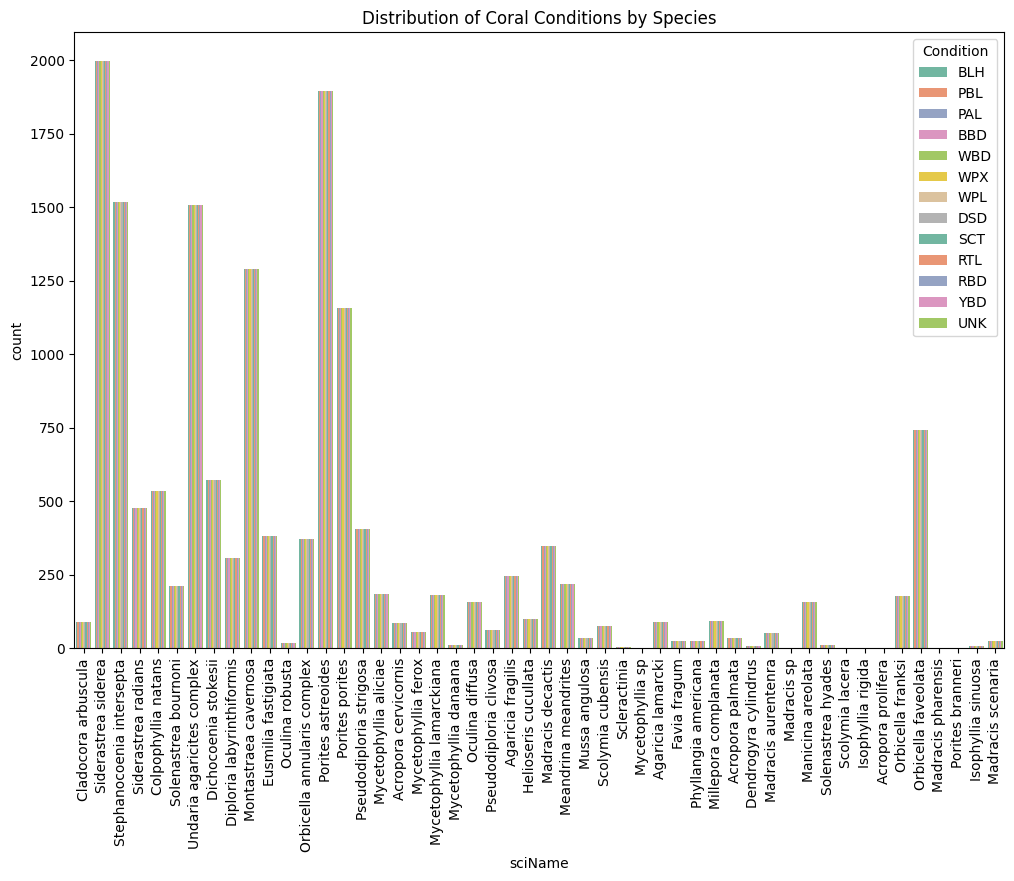

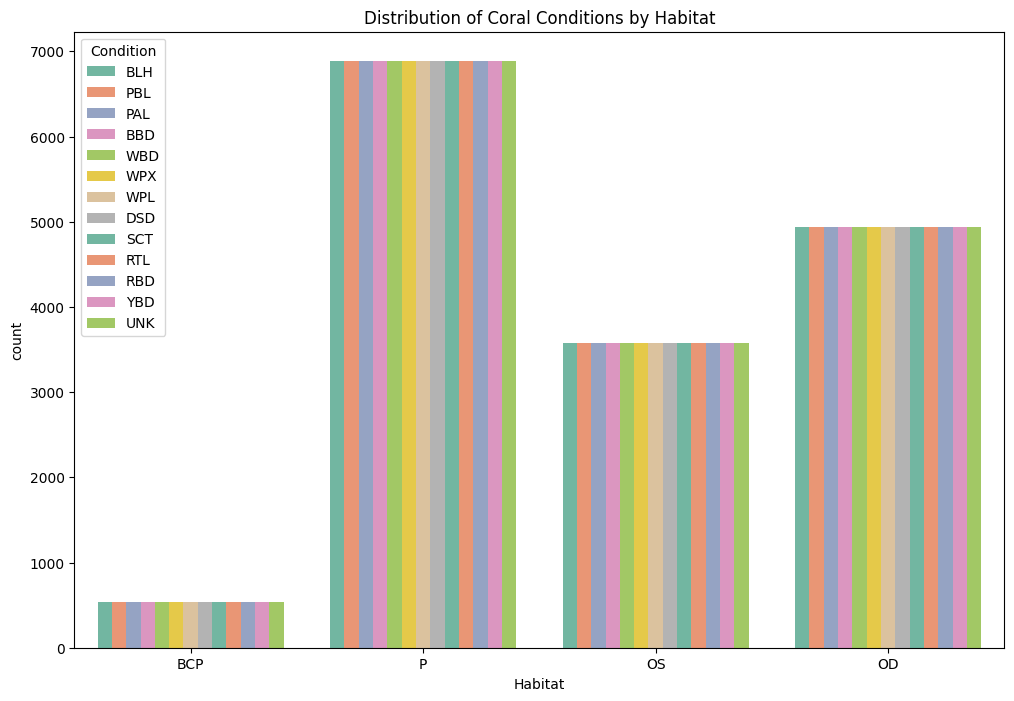

In [18]:
# 1. Coral Condition Distribution

# Melt the data to have conditions as a variable
conditions = ['BLH', 'PBL', 'PAL', 'BBD', 'WBD', 'WPX', 'WPL', 'DSD', 'SCT', 'RTL', 'RBD', 'YBD', 'UNK']
melted_data = data.rename(columns={'Count': 'Total_Count'}).melt(id_vars=['sciName', 'Habitat', 'Subregion'], value_vars=conditions, var_name='Condition', value_name='Count')

# Plot distribution of conditions by species
plt.figure(figsize=(12, 8))
sns.countplot(x='sciName', hue='Condition', data=melted_data, palette='Set2')
plt.xticks(rotation=90)
plt.title("Distribution of Coral Conditions by Species")
plt.show()

# Plot condition distribution across habitats and subregions
plt.figure(figsize=(12, 8))
sns.countplot(x='Habitat', hue='Condition', data=melted_data, palette='Set2')
plt.title("Distribution of Coral Conditions by Habitat")
plt.show()

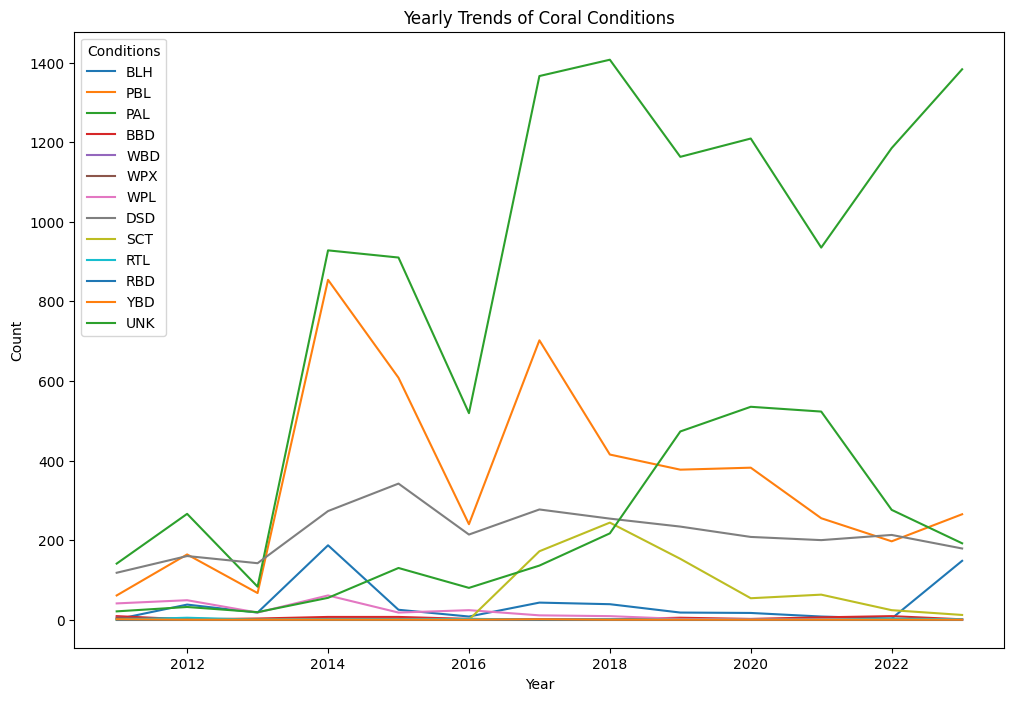

In [8]:
# 2. Yearly Trends

# Group data by year and condition
yearly_trends = data.groupby(['Year'])[conditions].sum()

# Plot trends for each condition over years
yearly_trends.plot(figsize=(12, 8))
plt.title("Yearly Trends of Coral Conditions")
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Conditions')
plt.show()

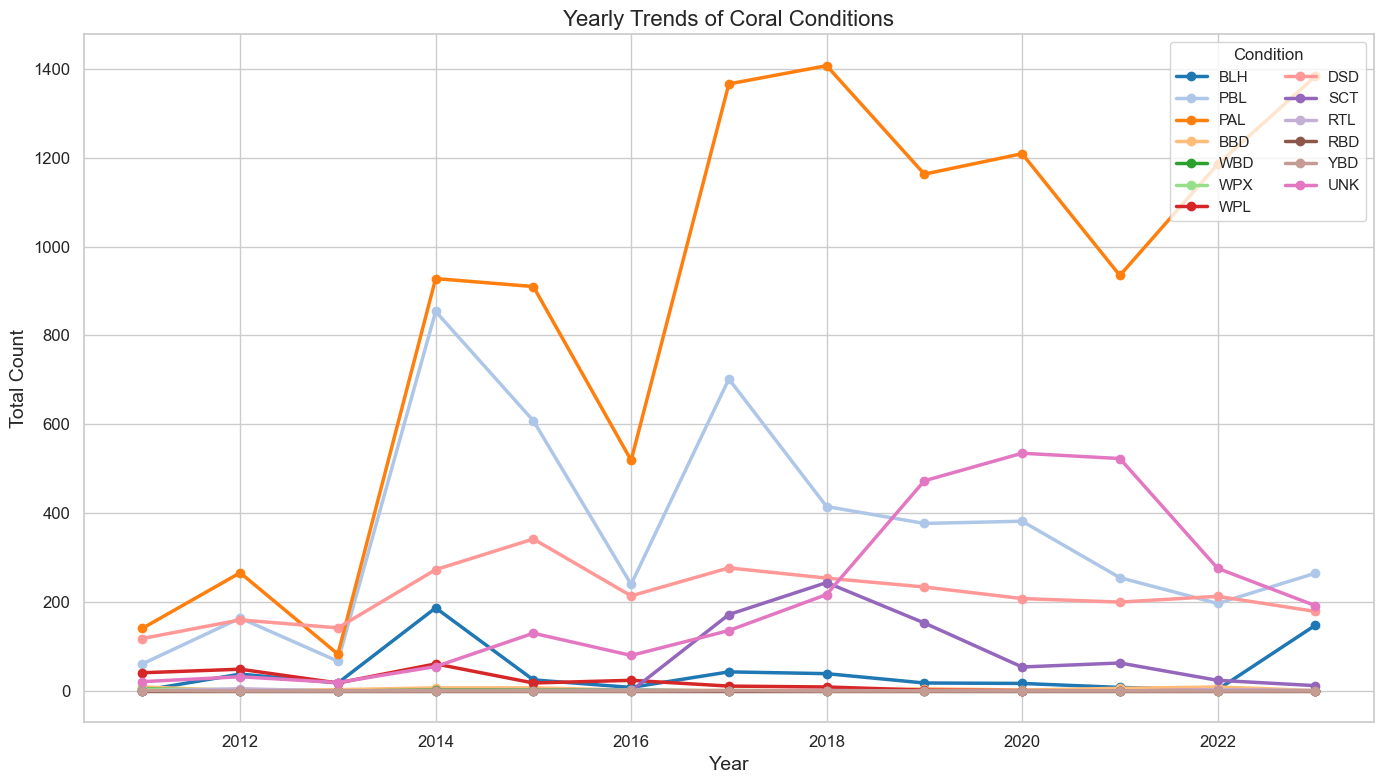

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style
sns.set(style="whitegrid")

# Group data by year and sum the condition counts
yearly_trends = data.groupby(['Year'])[conditions].sum()

# Plot trends with thicker lines and clear markers
plt.figure(figsize=(14, 8))

colors = sns.color_palette('tab20', n_colors=len(conditions))

for i, condition in enumerate(conditions):
    plt.plot(
        yearly_trends.index, 
        yearly_trends[condition], 
        label=condition, 
        linewidth=2.5, 
        marker='o', 
        color=colors[i % len(colors)]
    )

plt.title("Yearly Trends of Coral Conditions", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Condition", fontsize=11, title_fontsize=12, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

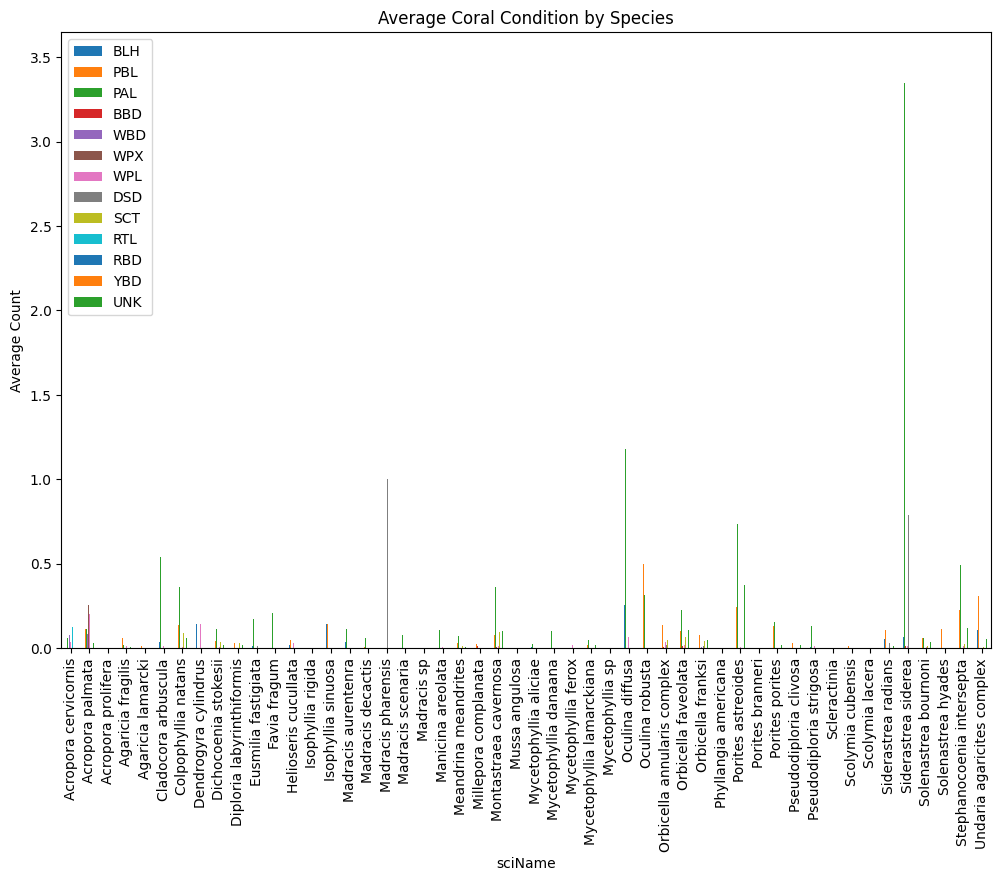

In [10]:
# 3. Species-Specific Trends

# Group by species and calculate mean values for each condition
species_trends = data.groupby('sciName')[conditions].mean()

# Plot species-specific trends
species_trends.plot(kind='bar', figsize=(12, 8))
plt.title("Average Coral Condition by Species")
plt.ylabel('Average Count')
plt.xticks(rotation=90)
plt.show()

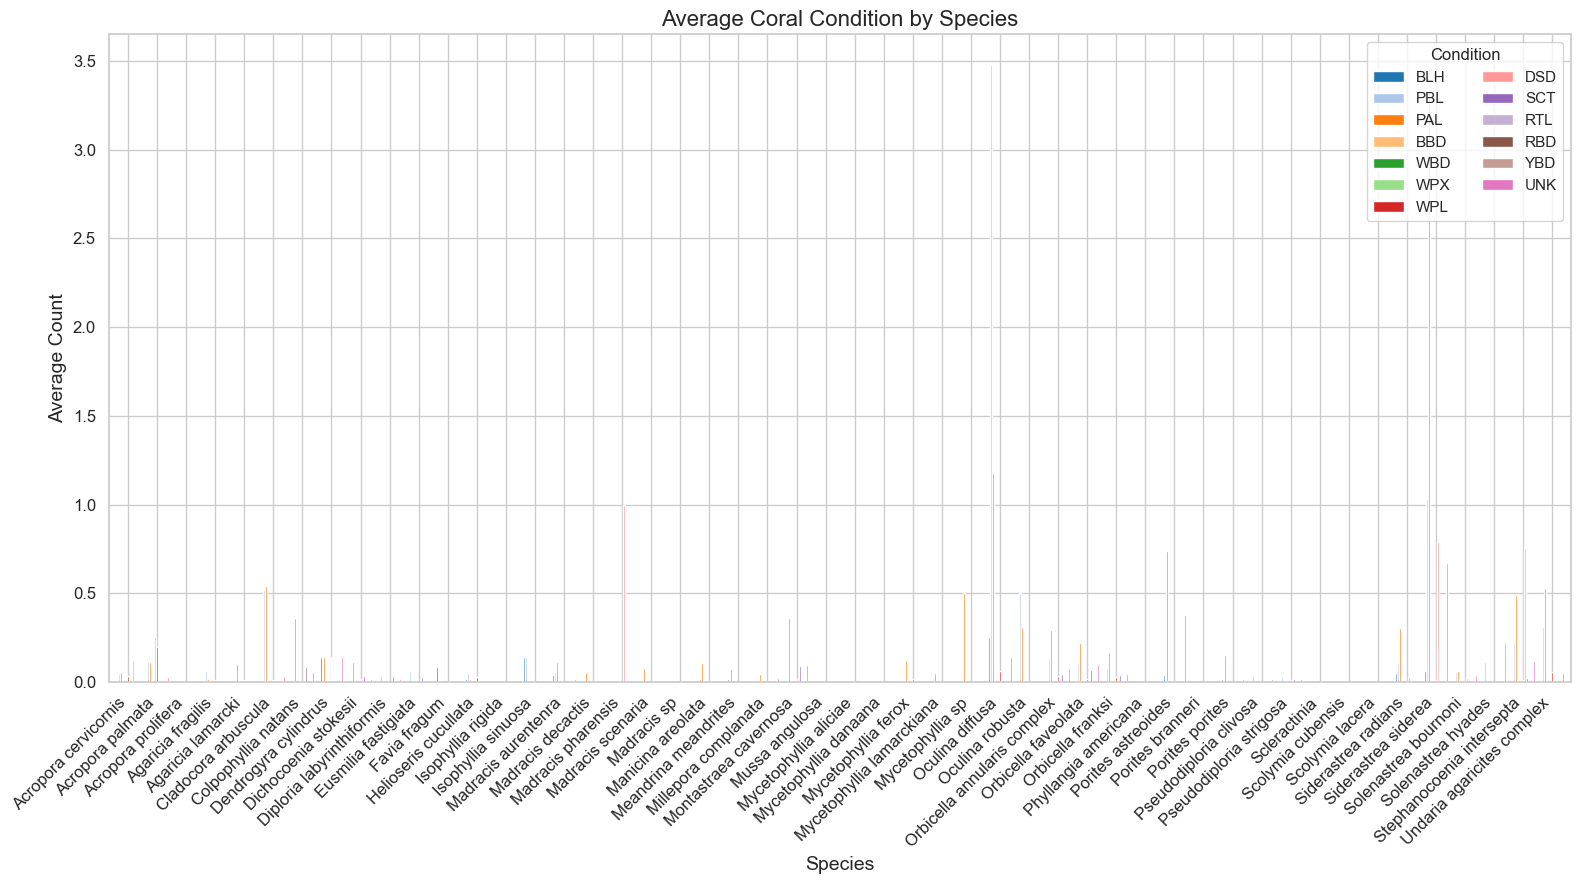

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn style
sns.set(style="whitegrid")

# Group by species and calculate mean condition values
species_trends = data.groupby('sciName')[conditions].mean()

# Plot grouped bar chart
species_trends.plot(kind='bar', 
                    figsize=(16, 9), 
                    width=0.8, 
                    color=sns.color_palette('tab20', n_colors=len(conditions)))

plt.title("Average Coral Condition by Species", fontsize=16)
plt.ylabel('Average Count', fontsize=14)
plt.xlabel('Species', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Condition', fontsize=11, title_fontsize=12, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

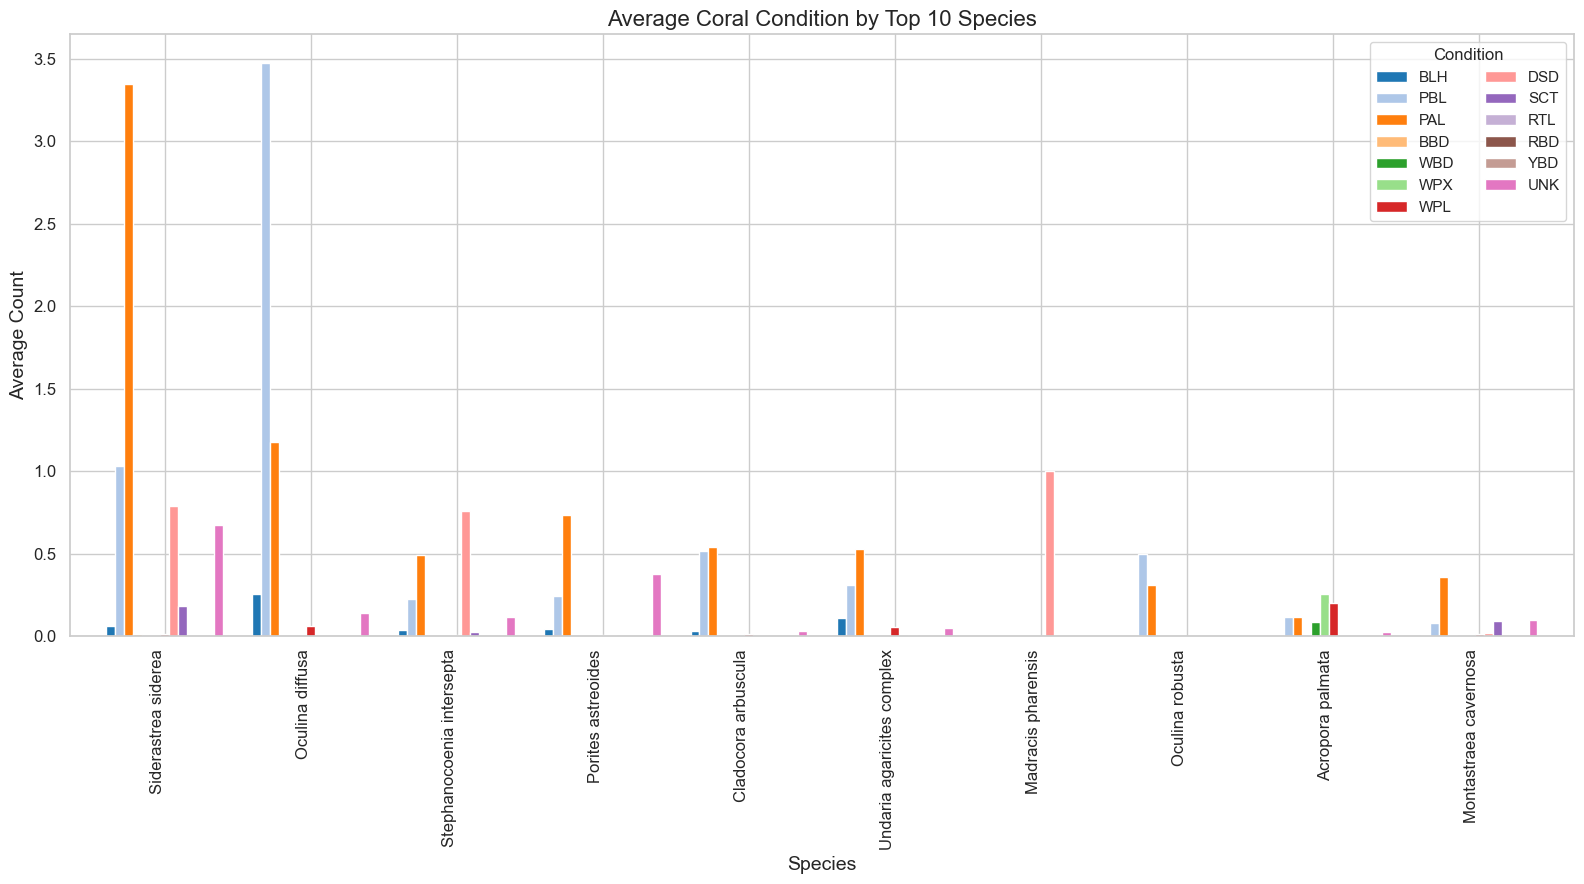

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn style
sns.set(style="whitegrid")

# Group by species and calculate mean condition values
species_trends = data.groupby('sciName')[conditions].mean()

# Compute total average condition count for sorting
species_trends['total'] = species_trends.sum(axis=1)

# Select top 10 species
top_species = species_trends.sort_values('total', ascending=False).drop(columns='total').head(10)

# Plot grouped bar chart
top_species.plot(kind='bar',
                 figsize=(16, 9),
                 width=0.8,
                 color=sns.color_palette('tab20', n_colors=len(conditions)))

plt.title("Average Coral Condition by Top 10 Species", fontsize=16)
plt.ylabel('Average Count', fontsize=14)
plt.xlabel('Species', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Condition', fontsize=11, title_fontsize=12, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

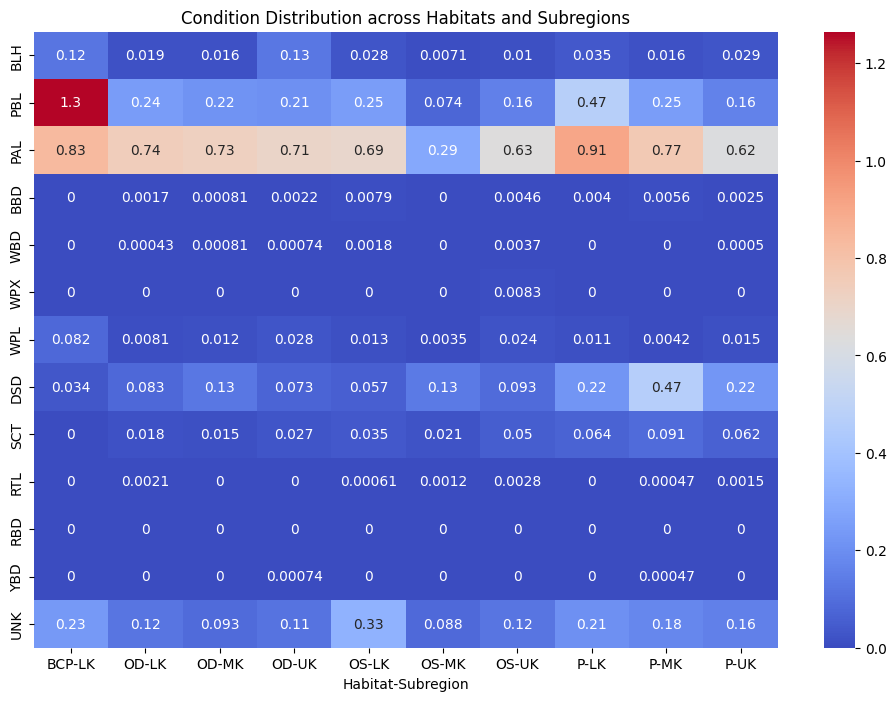

In [12]:
# 4. Subregion/Habitat-Specific Patterns

# Group by habitat and calculate mean values for each condition
subregion_habitat_trends = data.groupby(['Habitat', 'Subregion'])[conditions].mean().reset_index()

# Plot heatmap of conditions across habitats and subregions
plt.figure(figsize=(12, 8))
sns.heatmap(subregion_habitat_trends.set_index(['Habitat', 'Subregion']).T, annot=True, cmap='coolwarm')
plt.title("Condition Distribution across Habitats and Subregions")
plt.show()

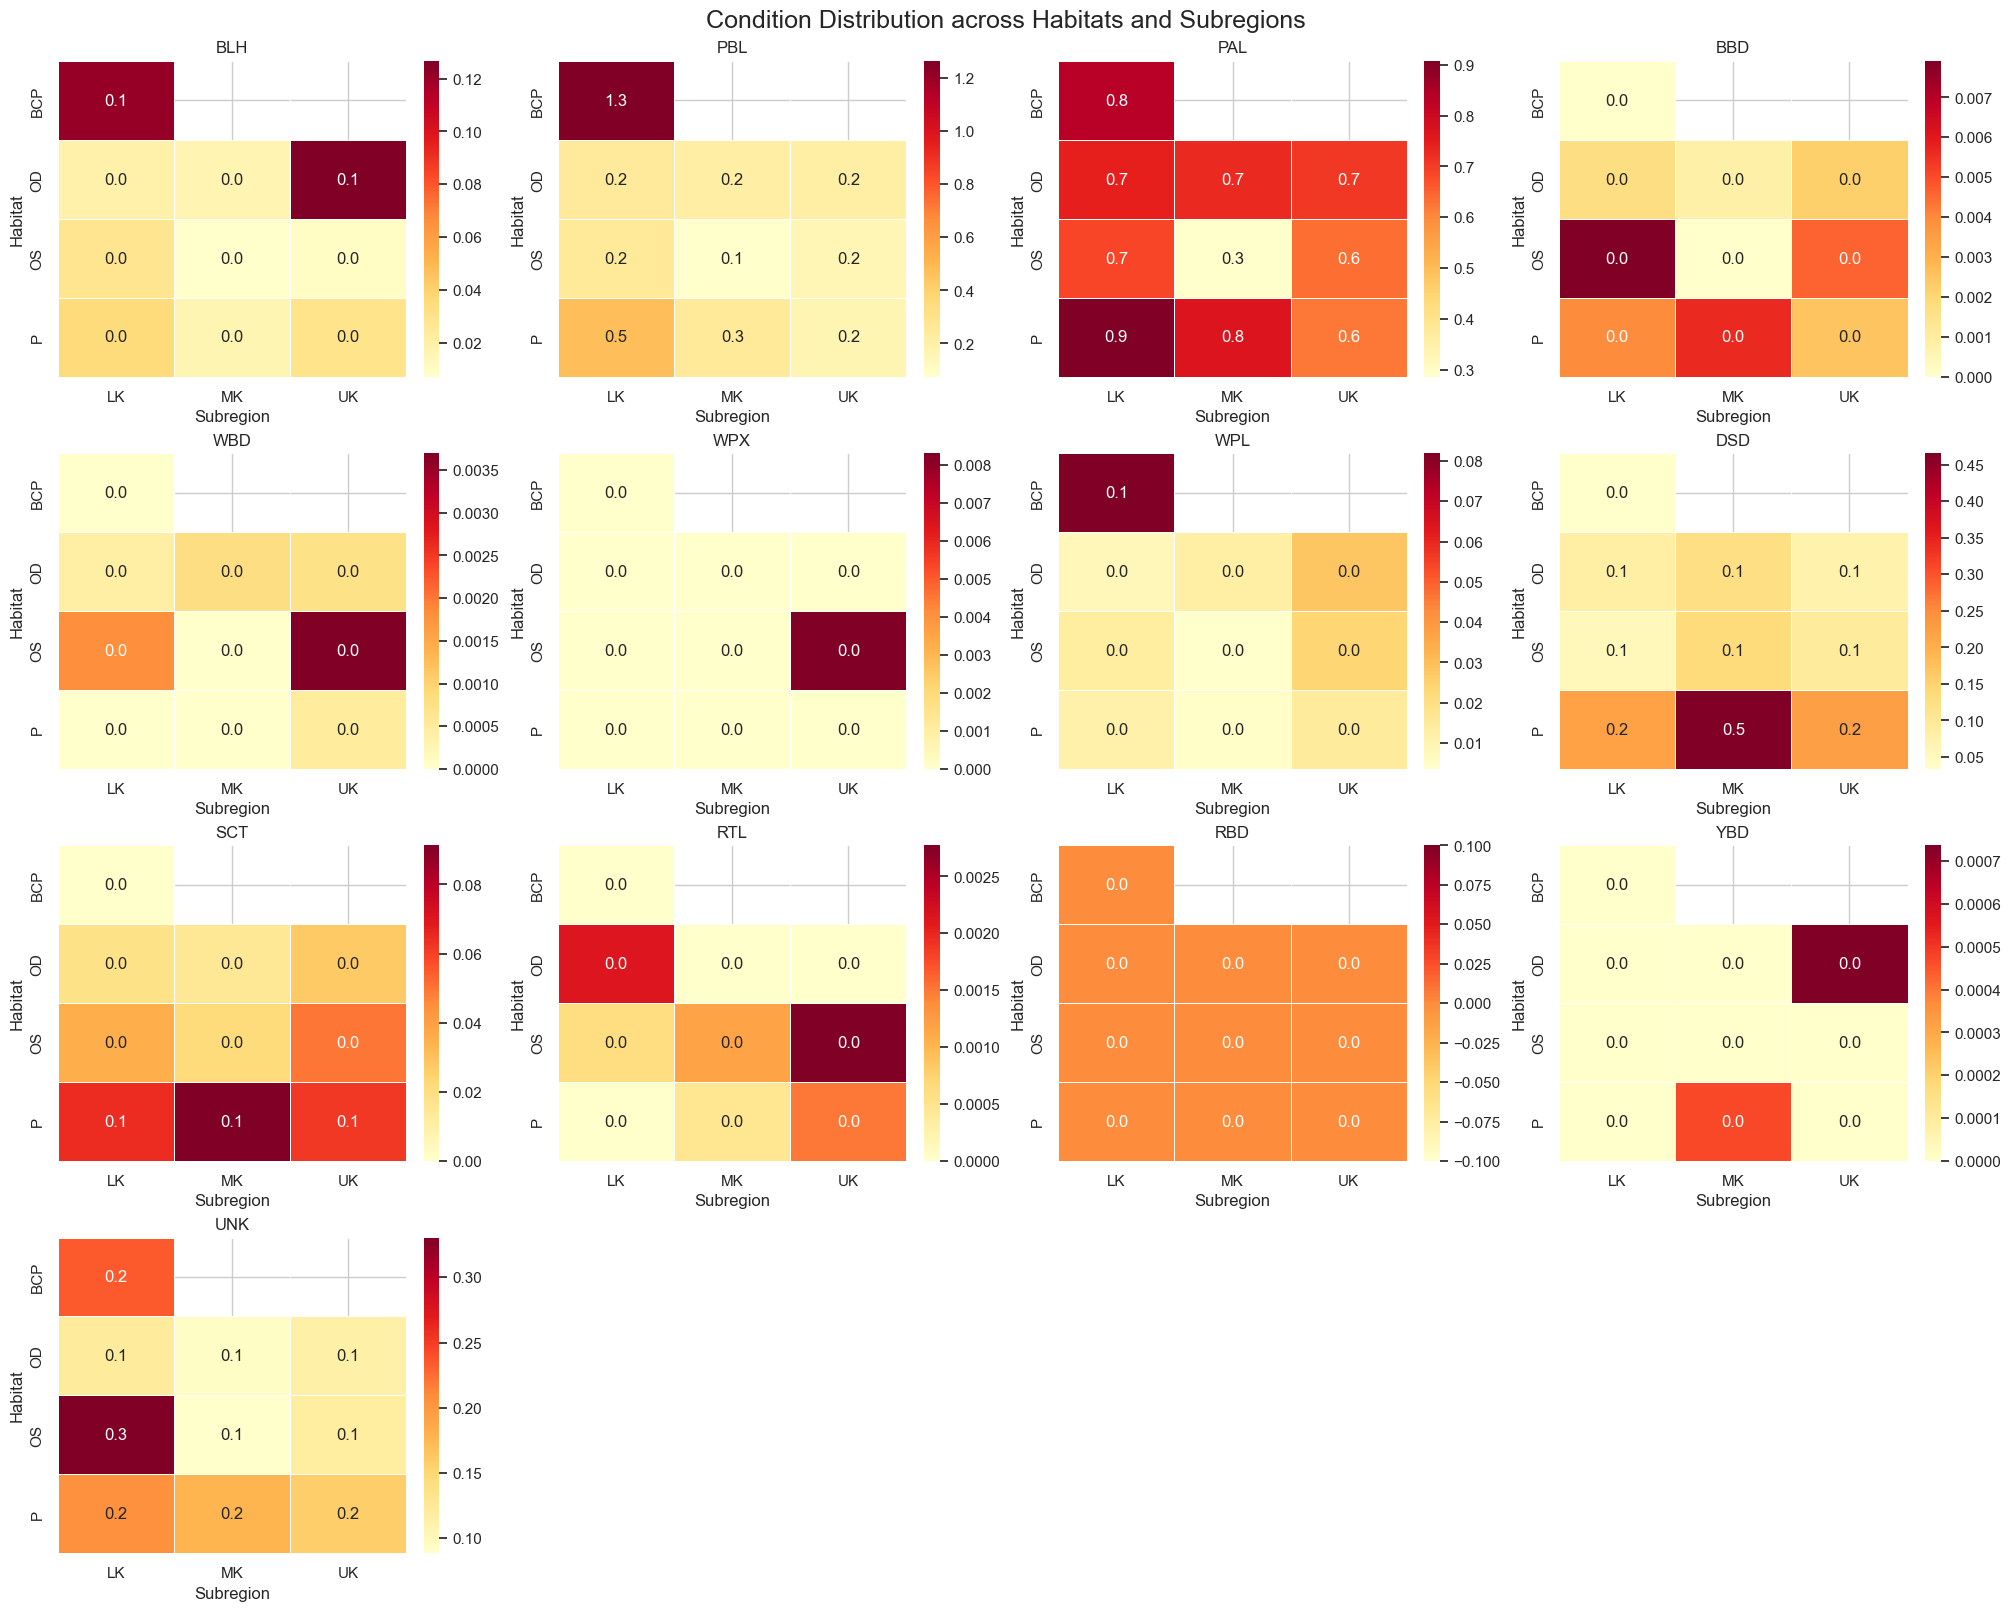

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data: average condition per Habitat and Subregion
pivot_data = data.groupby(['Habitat', 'Subregion'])[conditions].mean().reset_index()

# Set up a grid of heatmaps, one per condition
n_cols = 4
n_rows = (len(conditions) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

# Loop over each condition and plot a heatmap
for idx, condition in enumerate(conditions):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]

    # Create pivot table for the heatmap
    pivot = pivot_data.pivot(index='Habitat', columns='Subregion', values=condition)

    sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.1f', linewidths=0.5, ax=ax)
    ax.set_title(condition)
    ax.set_xlabel('Subregion')
    ax.set_ylabel('Habitat')

# Remove unused subplots
for idx in range(len(conditions), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

plt.suptitle("Condition Distribution across Habitats and Subregions", fontsize=18)
plt.show()

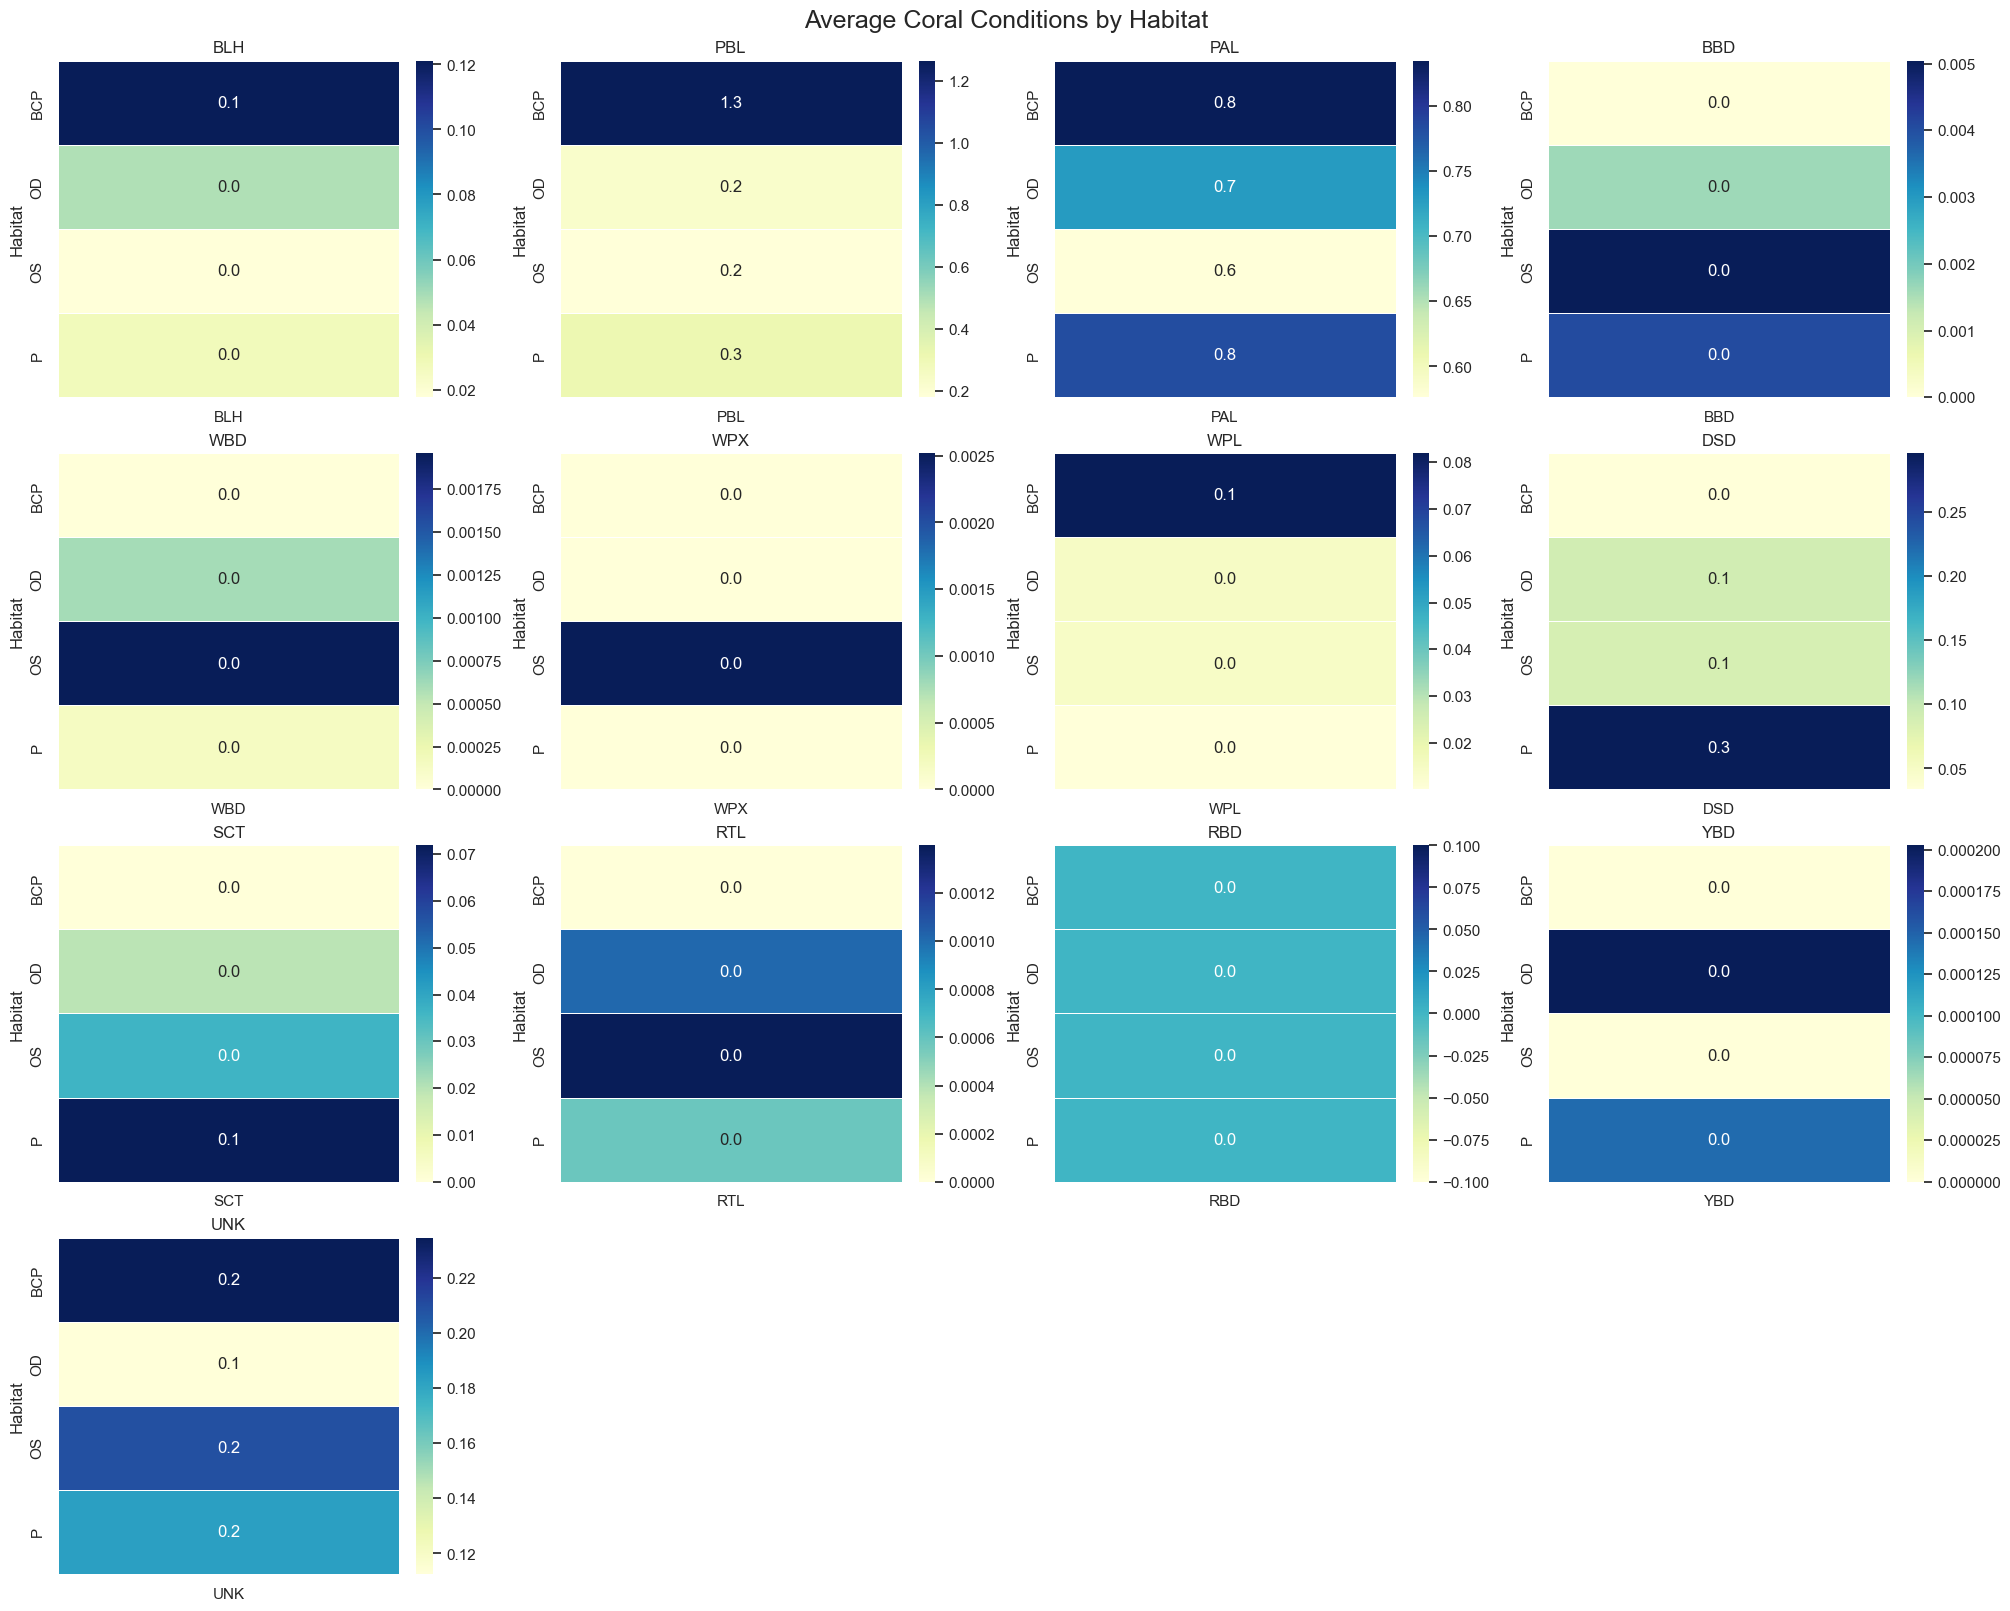

In [34]:
# Heatmaps: Condition Distribution by Habitat

# Group by Habitat and calculate mean values
habitat_avg = data.groupby('Habitat')[conditions].mean().reset_index()

# Plot heatmaps for each condition by Habitat
n_cols = 4
n_rows = (len(conditions) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

for idx, condition in enumerate(conditions):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]

    sns.heatmap(habitat_avg.pivot_table(index='Habitat', values=condition),
                annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5, ax=ax)
    ax.set_title(condition)
    ax.set_xlabel('')
    ax.set_ylabel('Habitat')

# Remove unused axes
for idx in range(len(conditions), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

plt.suptitle("Average Coral Conditions by Habitat", fontsize=18)
plt.show()

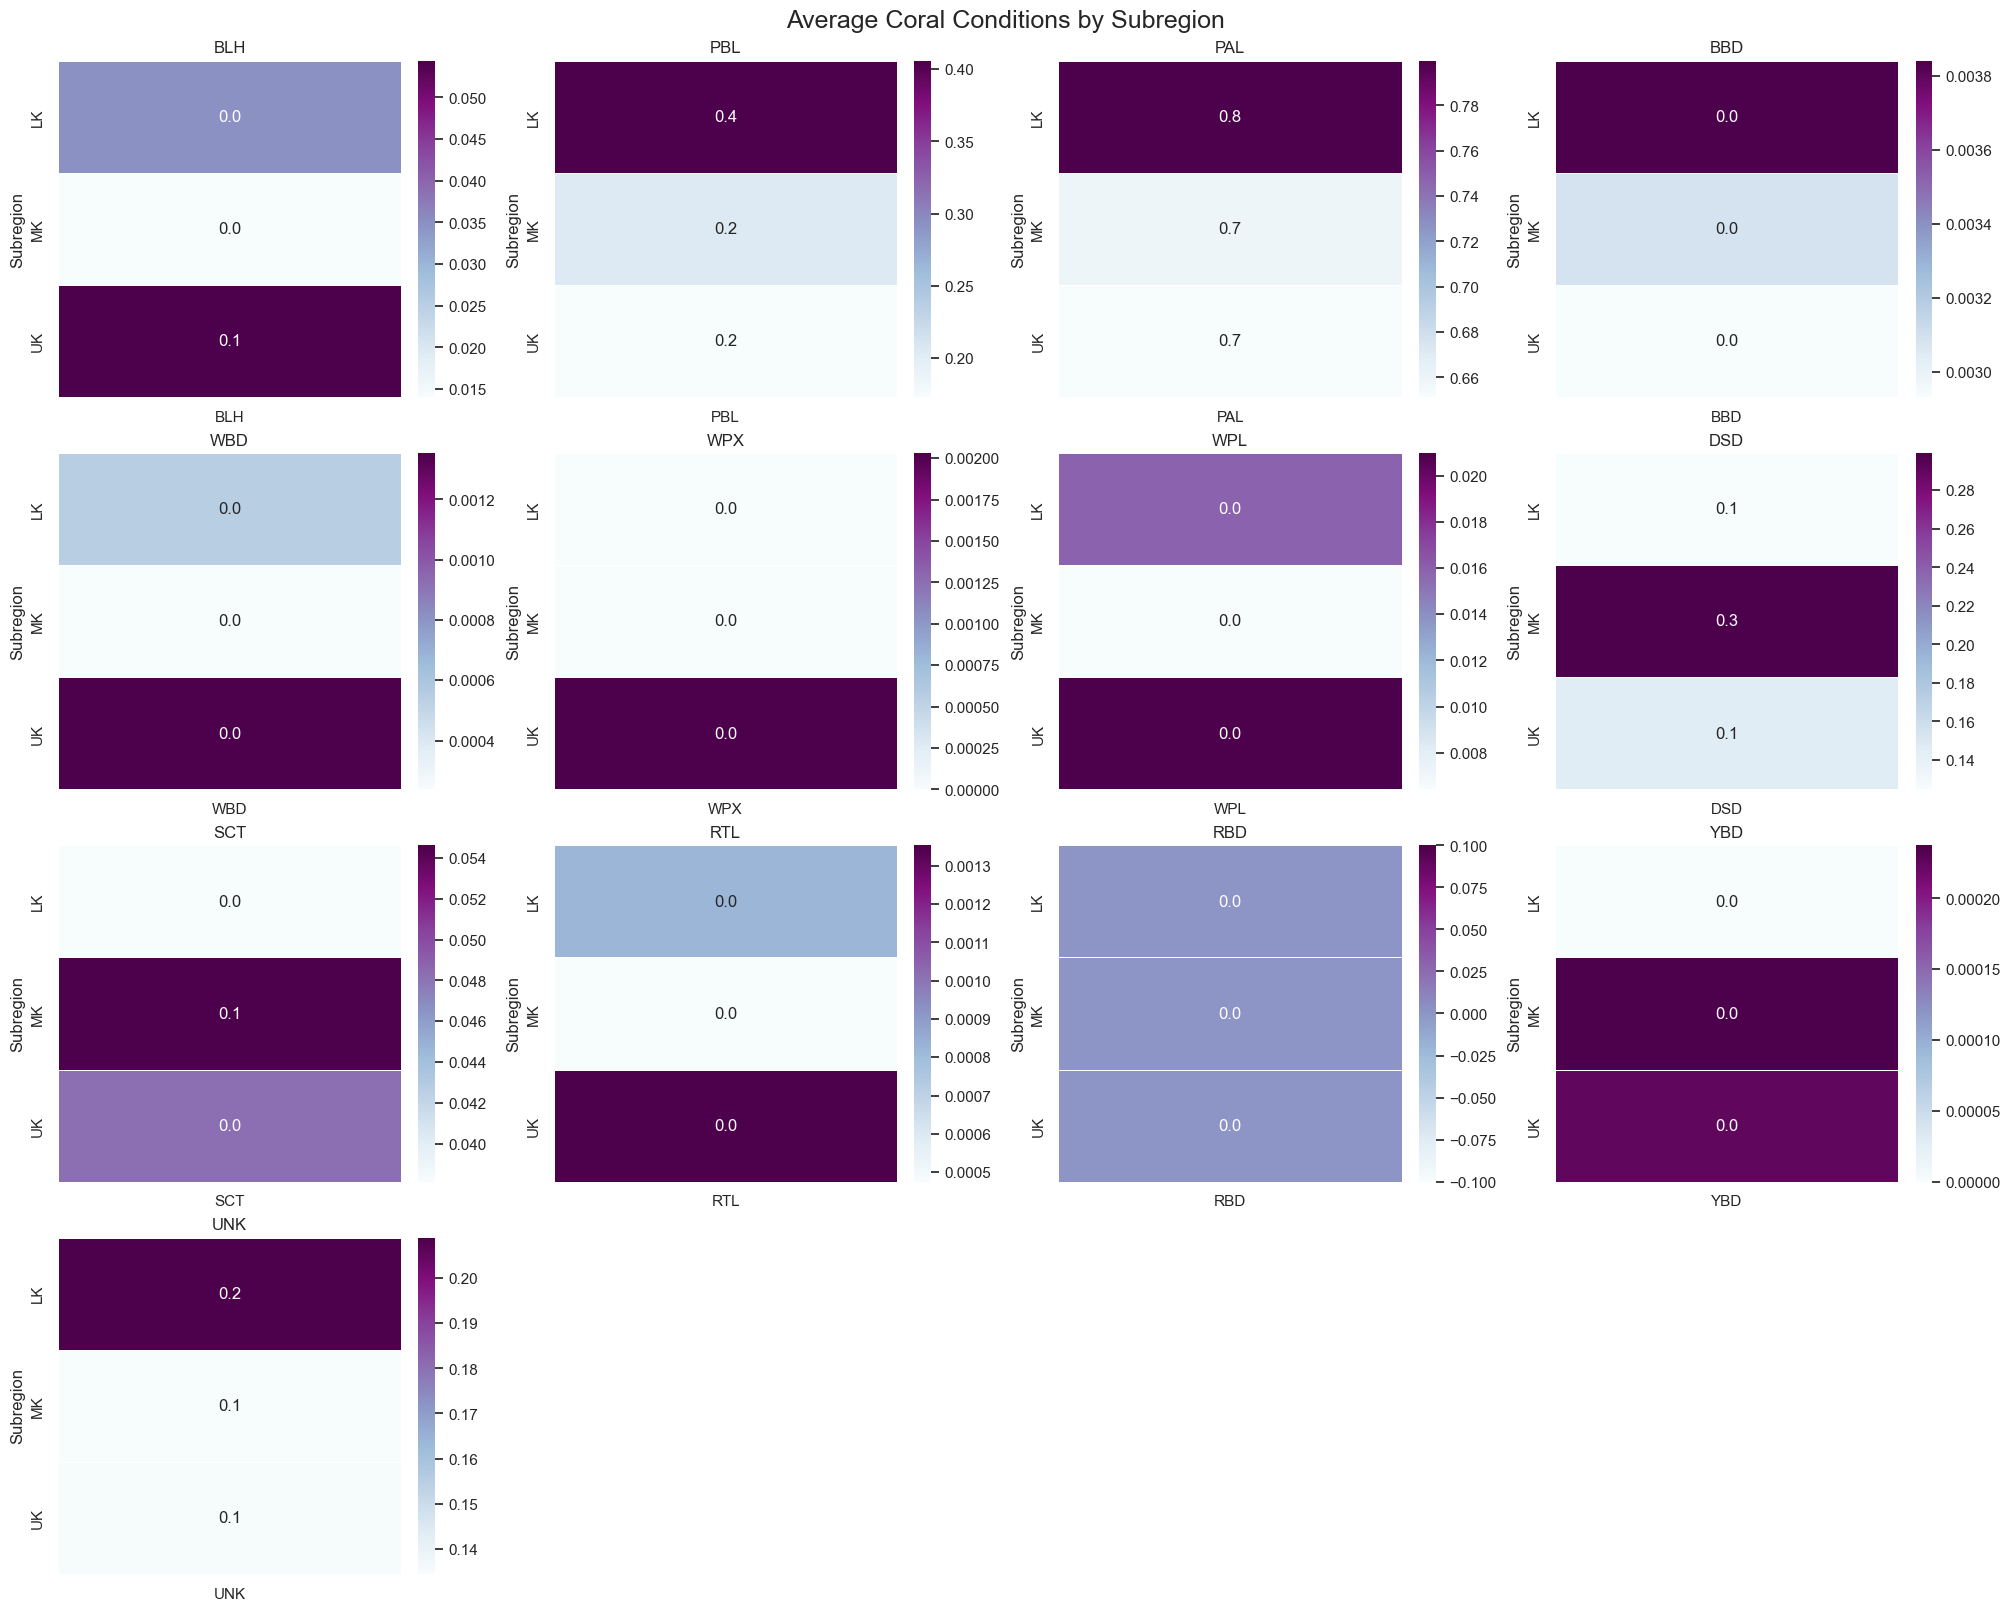

In [36]:
# Heatmaps: Condition Distribution by Subregion

# Group by Subregion and calculate mean values
subregion_avg = data.groupby('Subregion')[conditions].mean().reset_index()

# Plot heatmaps for each condition by Subregion
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

for idx, condition in enumerate(conditions):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]

    sns.heatmap(subregion_avg.pivot_table(index='Subregion', values=condition),
                annot=True, cmap='BuPu', fmt='.1f', linewidths=0.5, ax=ax)
    ax.set_title(condition)
    ax.set_xlabel('')
    ax.set_ylabel('Subregion')

# Remove unused axes
for idx in range(len(conditions), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

plt.suptitle("Average Coral Conditions by Subregion", fontsize=18)
plt.show()

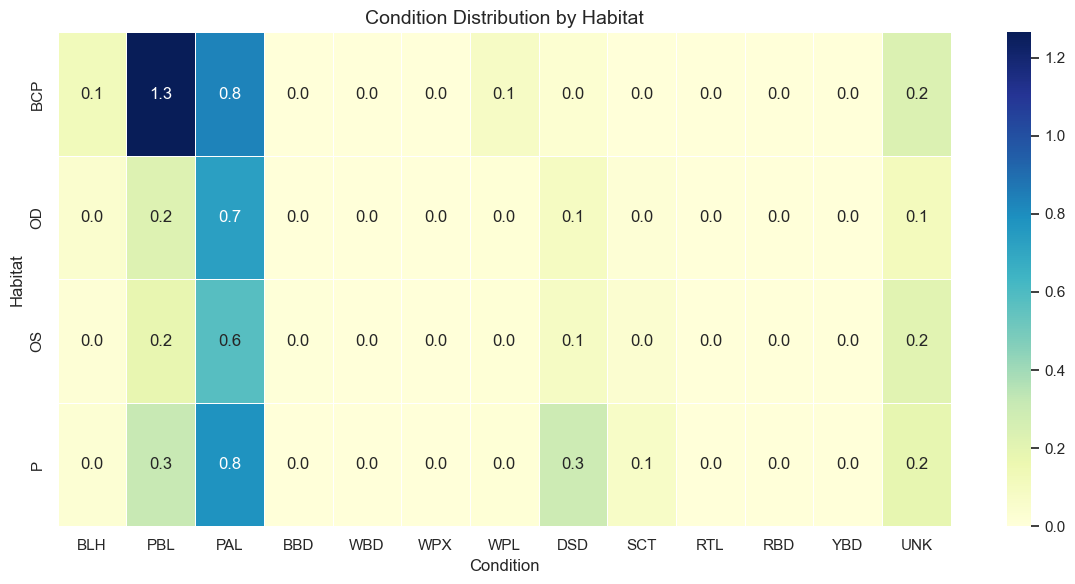

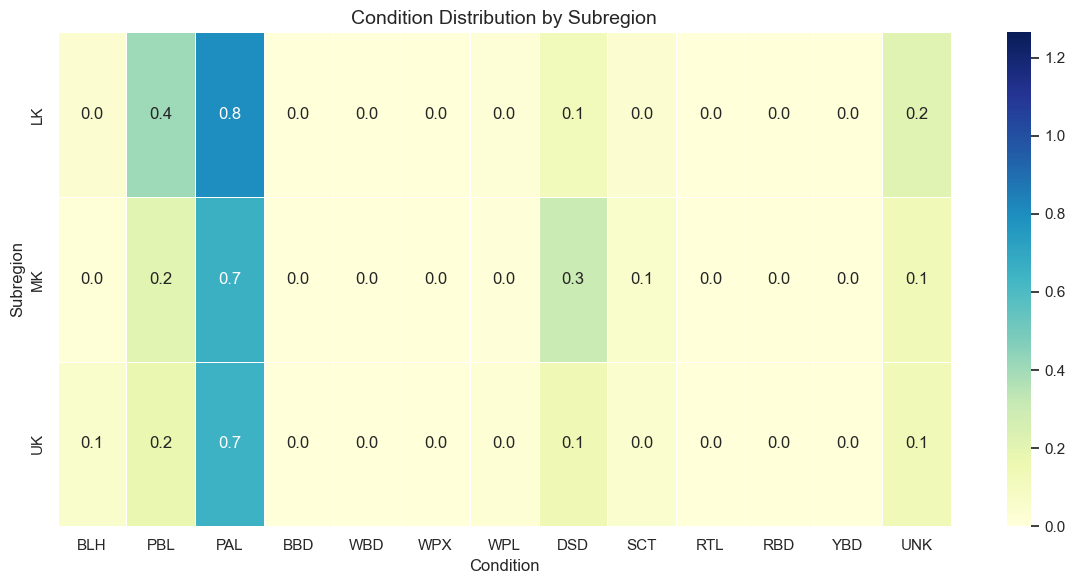

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the already loaded data and conditions from previous context
conditions = ['BLH', 'PBL', 'PAL', 'BBD', 'WBD', 'WPX', 'WPL', 'DSD', 'SCT', 'RTL', 'RBD', 'YBD', 'UNK']

# Calculate average condition values per Habitat and Subregion
habitat_avg = data.groupby('Habitat')[conditions].mean().reset_index()
subregion_avg = data.groupby('Subregion')[conditions].mean().reset_index()

# Determine global min and max for consistent color scaling
global_min = min(habitat_avg[conditions].min().min(), subregion_avg[conditions].min().min())
global_max = max(habitat_avg[conditions].max().max(), subregion_avg[conditions].max().max())

# Plot heatmap by Habitat
plt.figure(figsize=(12, 6))
sns.heatmap(habitat_avg.set_index('Habitat'), annot=True, cmap='YlGnBu', fmt='.1f',
            linewidths=0.5, vmin=global_min, vmax=global_max)
plt.title("Condition Distribution by Habitat", fontsize=14)
plt.xlabel("Condition")
plt.ylabel("Habitat")
plt.tight_layout()
plt.show()

# Plot heatmap by Subregion
plt.figure(figsize=(12, 6))
sns.heatmap(subregion_avg.set_index('Subregion'), annot=True, cmap='YlGnBu', fmt='.1f',
            linewidths=0.5, vmin=global_min, vmax=global_max)
plt.title("Condition Distribution by Subregion", fontsize=14)
plt.xlabel("Condition")
plt.ylabel("Subregion")
plt.tight_layout()
plt.show()

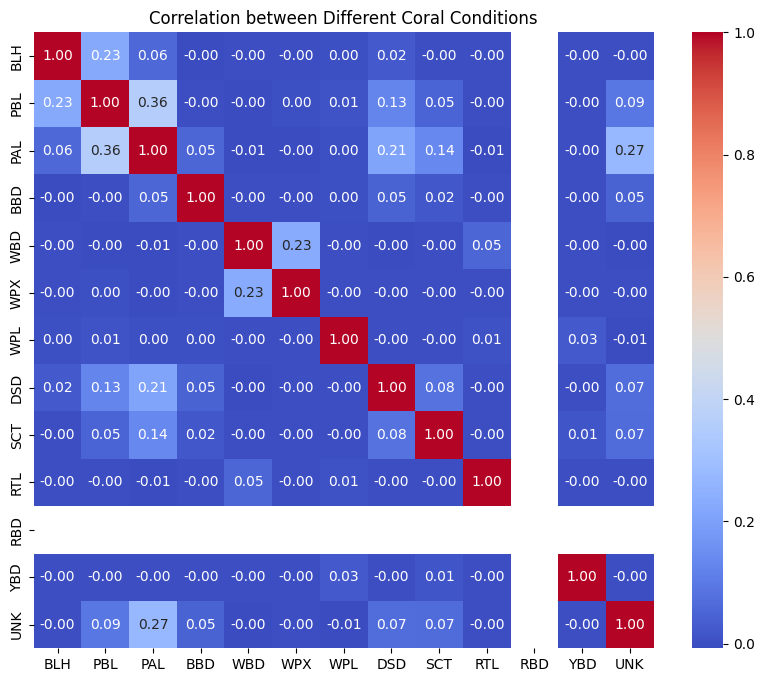

In [14]:
# 5. Correlation between Different Conditions

# Calculate correlation matrix
corr_matrix = data[conditions].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Different Coral Conditions")
plt.show()

In [16]:
corr_matrix

,BLH,PBL,PAL,BBD,WBD,WPX,WPL,DSD,SCT,RTL,RBD,YBD,UNK
BLH,1.000000,0.226193,0.056613,-0.004662,-0.002105,-0.001295,0.002950,0.024789,-0.002001,-0.001825,NaN,-0.000975,-0.001489
PBL,0.226193,1.000000,0.360734,-0.001777,-0.004899,0.000476,0.009793,0.128298,0.048756,-0.003194,NaN,-0.002271,0.094435
PAL,0.056613,0.360734,1.000000,0.054774,-0.007704,-0.004738,0.003102,0.210532,0.137104,-0.005358,NaN,-0.003570,0.273143
BBD,-0.004662,-0.001777,0.054774,1.000000,-0.001295,-0.000796,0.000977,0.046463,0.016330,-0.001123,NaN,-0.000600,0.047172
WBD,-0.002105,-0.004899,-0.007704,-0.001295,1.000000,0.231060,-0.001761,-0.004825,-0.002753,0.051934,NaN,-0.000271,-0.004139
WPX,-0.001295,0.000476,-0.004738,-0.000796,0.231060,1.000000,-0.001083,-0.002967,-0.001693,-0.000312,NaN,-0.000167,-0.002546
WPL,0.002950,0.009793,0.003102,0.000977,-0.001761,-0.001083,1.000000,-0.002679,-0.003641,0.005839,NaN,0.026741,-0.006836
DSD,0.024789,0.128298,0.210532,0.046463,-0.004825,-0.002967,-0.002679,1.000000,0.081350,-0.000799,NaN,-0.002236,0.068213
SCT,-0.002001,0.048756,0.137104,0.016330,-0.002753,-0.001693,-0.003641,0.081350,1.000000,-0.002387,NaN,0.012802,0.065144
RTL,-0.001825,-0.003194,-0.005358,-0.001123,0.051934,-0.000312,0.005839,-0.000799,-0.002387,1.000000,NaN,-0.000235,-0.003589
